
=== PART 1: X and Y matrices for 5-step example ===
Y_5 =
 [[0. 1. 2. 2. 4.]
 [0. 0. 1. 2. 2.]
 [1. 1. 0. 2. 0.]
 [0. 1. 1. 0. 0.]]
X_5 =
 [[0. 0. 1. 3. 5.]
 [0. 0. 0. 1. 3.]
 [0. 1. 2. 2. 4.]
 [0. 0. 1. 2. 2.]
 [1. 1. 0. 2. 0.]
 [0. 1. 1. 0. 0.]]

=== PART 2: Estimated A and B from 5-step data ===
A_est =
 [[ 1.44328993e-15  1.77635684e-15  1.00000000e+00  6.66133815e-16]
 [ 3.33333333e-01 -3.33333333e-01 -5.10702591e-15  6.66666667e-01]
 [-1.55431223e-15 -9.99200722e-16  3.10862447e-15 -2.22044605e-16]
 [ 4.44089210e-16 -3.33066907e-16  0.00000000e+00 -4.27016988e-16]]

B_est =
 [[-5.92054597e-16  4.44089210e-15]
 [-6.14992030e-16  6.21724894e-15]
 [ 1.00000000e+00 -3.55271368e-15]
 [ 1.17688697e-16  1.00000000e+00]]

True A =
 [[0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]]
True B =
 [[0 0]
 [0 0]
 [1 0]
 [0 1]]

=== PART 3: A_est and B_est for N=50 ===
A_est_50 =
 [[-1.43594128e-15  6.58785159e-16  5.00000000e-01 -5.00000000e-01]
 [ 1.43594128e-15 -6.58785159e-16 -5.00000000e-01  5.0

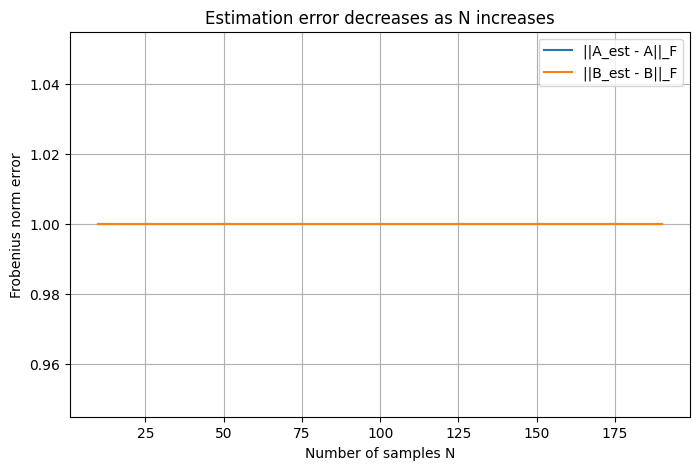

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# TRUE MATRICES A AND B (Point-Mass Model)

A_true = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

B_true = np.array([
    [0, 0],
    [0, 0],
    [1, 0],
    [0, 1]
])



# PART 1: Recreate the 5-step example from the assignment

dt = 1.0
U_5 = np.array([
    [1, 0],
    [1, 1],
    [0, 1],
    [2, 0],
    [0, 0]
])

N = 6
x = np.zeros((N, 4))

# simulate
for k in range(N - 1):
    x[k+1] = x[k] + dt * (A_true @ x[k] + B_true @ U_5[k])

# build X and Y
Y_5 = np.zeros((4, N-1))
X_5 = np.zeros((6, N-1))

for k in range(N - 1):
    Y_5[:, k] = (x[k+1] - x[k]) / dt
    X_5[:, k] = np.hstack([x[k], U_5[k]])

print("\n=== PART 1: X and Y matrices for 5-step example ===")
print("Y_5 =\n", Y_5)
print("X_5 =\n", X_5)



# PART 2: Compute [A B]_est = Y * X^+ and compare

X_pinv_5 = np.linalg.pinv(X_5)
M_est_5 = Y_5 @ X_pinv_5

A_est_5 = M_est_5[:, :4]
B_est_5 = M_est_5[:, 4:]

print("\n=== PART 2: Estimated A and B from 5-step data ===")
print("A_est =\n", A_est_5)
print("\nB_est =\n", B_est_5)

print("\nTrue A =\n", A_true)
print("True B =\n", B_true)



# PART 3: GENERATE YOUR OWN DATASET WITH N = 50

def generate_dataset(N=50, dt=0.1):
    x = np.zeros((N, 4))
    u = np.zeros((N-1, 2))

    for k in range(N-1):
        
        if (k // 5) % 2 == 0:
            u[k] = [1.0, -1.0]
        else:
            u[k] = [-1.0, 1.0]

        x[k+1] = x[k] + dt * (A_true @ x[k] + B_true @ u[k])

    
    Y = np.zeros((4, N-1))
    X = np.zeros((6, N-1))
    for k in range(N-1):
        Y[:, k] = (x[k+1] - x[k]) / dt
        X[:, k] = np.hstack([x[k], u[k]])

    return X, Y


X_50, Y_50 = generate_dataset(N=50, dt=0.1)
M_est_50 = Y_50 @ np.linalg.pinv(X_50)

A_est_50 = M_est_50[:, :4]
B_est_50 = M_est_50[:, 4:]

print("\n=== PART 3: A_est and B_est for N=50 ===")
print("A_est_50 =\n", A_est_50)
print("\nB_est_50 =\n", B_est_50)



# PART 4: Show Frobenius norm errors decrease with N

def estimate_error(N):
    X, Y = generate_dataset(N=N, dt=0.1)
    M_est = Y @ np.linalg.pinv(X)
    A_est = M_est[:, :4]
    B_est = M_est[:, 4:]
    err_A = np.linalg.norm(A_est - A_true, 'fro')
    err_B = np.linalg.norm(B_est - B_true, 'fro')
    return err_A, err_B

Ns = np.arange(10, 200, 10)
errors_A = []
errors_B = []

for N in Ns:
    eA, eB = estimate_error(N)
    errors_A.append(eA)
    errors_B.append(eB)

# plot
plt.figure(figsize=(8,5))
plt.plot(Ns, errors_A, label='||A_est - A||_F')
plt.plot(Ns, errors_B, label='||B_est - B||_F')
plt.xlabel("Number of samples N")
plt.ylabel("Frobenius norm error")
plt.title("Estimation error decreases as N increases")
plt.legend()
plt.grid(True)
plt.show()
